In [210]:
# Import
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer

data = pd.read_csv('../data/train.csv')

In [211]:
# Structure data
data = data.drop(['Id'], axis=1)
X_unprocessed = data.drop('y', axis=1)
y = data['y']

In [212]:
# Create feature vector
def phi(x):
    t = np.zeros(21)
    t[0:5] = x
    t[5:10] = x**2
    t[10:15] = np.exp(x)
    t[15:20] = np.cos(x)
    t[20] = 1
    return pd.Series(t)

X = X_unprocessed.transform(phi, axis=1)

In [213]:
# Create linear model

models = [LinearRegression(), 
          Ridge(alpha=0.1), 
          Ridge(alpha=1), 
          Ridge(alpha=10), 
          Ridge(alpha=100), 
          Ridge(alpha=1000),
          Ridge(alpha=10000),
          Ridge(alpha=300),]

for i in range(0, len(models)):
    score = cross_val_score(models[i], X, y, cv=10, scoring=make_scorer(mean_squared_error))
    RMSE = np.sqrt(score)
    av_RMSE = np.average(RMSE)
    print('Model ' + str(i) + ': '+ str(av_RMSE))

Model 0: 10.047246371190846
Model 1: 10.04601105415592
Model 2: 10.03684971576239
Model 3: 10.000819158226658
Model 4: 9.94220155178799
Model 5: 9.95602155744648
Model 6: 10.291752104908365
Model 7: 9.926356713475752


375


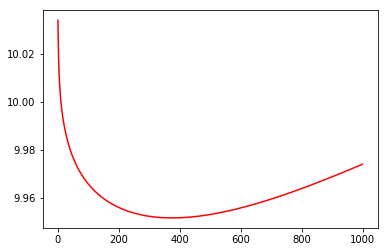

In [221]:
# Explore alphas for ridge regression

RMSEs = np.zeros(1000)

for i in range(0, 1000):
    score = cross_val_score(Ridge(alpha=i), X, y, cv=6, scoring=make_scorer(mean_squared_error))
    RMSE = np.sqrt(score)
    av_RMSE = np.average(RMSE)
    RMSEs[i] = av_RMSE
    
plt.plot(range(0,1000), RMSEs, color='red')
print(np.argmin(RMSEs))

In [220]:
# Get weights
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Ridge(alpha=347, fit_intercept=False)
model.fit(X, y)
y_pred = model.predict(X_test)

RMSE = mean_squared_error(y_test, y_pred)**0.5
print('Error: ' + str(RMSE))
coef = pd.Series(model.coef_)
print(coef)
coef.to_csv('weights.csv', index=False)

Error: 9.97043519765813
0     0.931450
1    -0.462232
2    -0.025640
3     0.344401
4    -0.047097
5    -0.959881
6     0.134283
7    -0.410817
8    -0.376230
9     0.529825
10    0.801518
11   -0.437608
12   -0.991721
13    0.032649
14   -0.059239
15    0.062928
16   -0.330282
17   -0.166773
18   -0.364841
19   -0.326477
20   -0.373988
dtype: float64
